# Hyperparameter Analysis

In [239]:
# importing libraries
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h2o
import pandas_profiling
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,accuracy_score, r2_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import KFold

In [194]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM (build 25.152-b12, mixed mode)56-b12)
  Starting server from C:\Users\Sharvari Karnik\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\SHARVA~1\AppData\Local\Temp\tmpoukav28d
  JVM stdout: C:\Users\SHARVA~1\AppData\Local\Temp\tmpoukav28d\h2o_Sharvari_Karnik_started_from_python.out
  JVM stderr: C:\Users\SHARVA~1\AppData\Local\Temp\tmpoukav28d\h2o_Sharvari_Karnik_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,04 secs
H2O cluster version:,3.14.0.1
H2O cluster version age:,"1 year, 8 months and 15 days !!!"
H2O cluster name:,H2O_from_python_Sharvari_Karnik_n4v7nz
H2O cluster total nodes:,1
H2O cluster free memory:,1.745 Gb
H2O cluster total cores:,0
H2O cluster allowed cores:,0
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54321
H2O connection proxy:,None


In [79]:
#ignoring the warnings
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter('ignore')

# Analysis for GBM

In [361]:
# importing the dataset
gbm_df = pd.read_csv("gbm_actual.csv")

In [362]:
gbm_df.head()

,Unnamed: 0,modelId,learn_rate,learn_rate_annealing,col_sample_rate,max_abs_leafnode_pred,pred_noise_bandwidth,distribution,tweedie,quantile_alpha,...,max_depth,min_rows,sample_rate,col_sample_rate_per_tree,min_split_improvement,auc,logloss,mean_per_class_error,rmse,mse
0,0,GBM_grid_1_AutoML_20190415_223833_model_4,0.008,1,0.7,1.80E+308,0,bernoulli,1.5,0.5,...,16,30,0.7,0.7,0.00001,0.662256,0.219720,0.498435,0.233198,0.054381
1,1,GBM_4_AutoML_20190415_223833,0.100,1,0.8,1.80E+308,0,bernoulli,1.5,0.5,...,15,100,0.8,0.8,0.00001,0.845188,0.159094,0.362836,0.202633,0.041060
2,2,GBM_3_AutoML_20190415_223833,0.100,1,0.8,1.80E+308,0,bernoulli,1.5,0.5,...,15,100,0.8,0.8,0.00001,0.838918,0.162047,0.395250,0.204578,0.041852
3,3,GBM_grid_1_AutoML_20190415_223833_model_7,0.005,1,0.7,1.80E+308,0,bernoulli,1.5,0.5,...,13,15,0.6,0.7,0.00001,0.834055,0.165500,0.402744,0.207991,0.043260
4,4,GBM_2_AutoML_20190415_223833,0.100,1,0.8,1.80E+308,0,bernoulli,1.5,0.5,...,15,100,0.8,0.8,0.00001,0.838414,0.164005,0.380590,0.206666,0.042711


In [363]:
# Checking for null values
gbm_df.isnull().values.any()

False

In [364]:
gbm_df= gbm_df.drop(columns=['distribution','categorical_encoding','histogram_type','max_abs_leafnode_pred'])
gbm_df

,Unnamed: 0,modelId,learn_rate,learn_rate_annealing,col_sample_rate,pred_noise_bandwidth,tweedie,quantile_alpha,huber_alpha,ntrees,max_depth,min_rows,sample_rate,col_sample_rate_per_tree,min_split_improvement,auc,logloss,mean_per_class_error,rmse,mse
0,0,GBM_grid_1_AutoML_20190415_223833_model_4,0.008,1,0.7,0,1.5,0.5,0.9,295,16,30,0.7,0.7,0.00001,0.662256,0.219720,0.498435,0.233198,0.054381
1,1,GBM_4_AutoML_20190415_223833,0.100,1,0.8,0,1.5,0.5,0.9,96,15,100,0.8,0.8,0.00001,0.845188,0.159094,0.362836,0.202633,0.041060
2,2,GBM_3_AutoML_20190415_223833,0.100,1,0.8,0,1.5,0.5,0.9,96,15,100,0.8,0.8,0.00001,0.838918,0.162047,0.395250,0.204578,0.041852
3,3,GBM_grid_1_AutoML_20190415_223833_model_7,0.005,1,0.7,0,1.5,0.5,0.9,165,13,15,0.6,0.7,0.00001,0.834055,0.165500,0.402744,0.207991,0.043260
4,4,GBM_2_AutoML_20190415_223833,0.100,1,0.8,0,1.5,0.5,0.9,96,15,100,0.8,0.8,0.00001,0.838414,0.164005,0.380590,0.206666,0.042711
5,5,GBM_5_AutoML_20190415_223833,0.100,1,0.8,0,1.5,0.5,0.9,96,15,100,0.8,0.8,0.00001,0.838349,0.164148,0.367523,0.206559,0.042667
6,6,GBM_grid_1_AutoML_20190415_223833_model_2,0.050,1,1.0,0,1.5,0.5,0.9,203,7,1,0.9,1.0,0.00001,0.734353,0.200990,0.491529,0.226813,0.051444
7,7,GBM_1_AutoML_20190415_223833,0.100,1,0.8,0,1.5,0.5,0.9,96,15,100,0.8,0.8,0.00001,0.522591,0.220979,0.500000,0.233517,0.054530
8,8,GBM_grid_1_AutoML_20190415_223833_model_1,0.001,1,1.0,0,1.5,0.5,0.9,69,13,15,0.7,0.7,0.00010,0.830971,0.166941,0.372203,0.208379,0.043422
9,9,GBM_grid_1_AutoML_20190415_223833_model_3,0.010,1,0.7,0,1.5,0.5,0.9,185,7,10,0.7,0.4,0.00001,0.839477,0.162258,0.385753,0.205124,0.042076


In [359]:
gbm_df.drop(gbm_df.columns[0] , axis=1)

,modelId,learn_rate,learn_rate_annealing,col_sample_rate,pred_noise_bandwidth,distribution,tweedie,quantile_alpha,huber_alpha,categorical_encoding,...,max_depth,min_rows,sample_rate,col_sample_rate_per_tree,min_split_improvement,auc,logloss,mean_per_class_error,rmse,mse
0,GBM_grid_1_AutoML_20190415_223833_model_4,0.008,1,0.7,0,bernoulli,1.5,0.5,0.9,AUTO,...,16,30,0.7,0.7,0.00001,0.662256,0.219720,0.498435,0.233198,0.054381
1,GBM_4_AutoML_20190415_223833,0.100,1,0.8,0,bernoulli,1.5,0.5,0.9,AUTO,...,15,100,0.8,0.8,0.00001,0.845188,0.159094,0.362836,0.202633,0.041060
2,GBM_3_AutoML_20190415_223833,0.100,1,0.8,0,bernoulli,1.5,0.5,0.9,AUTO,...,15,100,0.8,0.8,0.00001,0.838918,0.162047,0.395250,0.204578,0.041852
3,GBM_grid_1_AutoML_20190415_223833_model_7,0.005,1,0.7,0,bernoulli,1.5,0.5,0.9,AUTO,...,13,15,0.6,0.7,0.00001,0.834055,0.165500,0.402744,0.207991,0.043260
4,GBM_2_AutoML_20190415_223833,0.100,1,0.8,0,bernoulli,1.5,0.5,0.9,AUTO,...,15,100,0.8,0.8,0.00001,0.838414,0.164005,0.380590,0.206666,0.042711
5,GBM_5_AutoML_20190415_223833,0.100,1,0.8,0,bernoulli,1.5,0.5,0.9,AUTO,...,15,100,0.8,0.8,0.00001,0.838349,0.164148,0.367523,0.206559,0.042667
6,GBM_grid_1_AutoML_20190415_223833_model_2,0.050,1,1.0,0,bernoulli,1.5,0.5,0.9,AUTO,...,7,1,0.9,1.0,0.00001,0.734353,0.200990,0.491529,0.226813,0.051444
7,GBM_1_AutoML_20190415_223833,0.100,1,0.8,0,bernoulli,1.5,0.5,0.9,AUTO,...,15,100,0.8,0.8,0.00001,0.522591,0.220979,0.500000,0.233517,0.054530
8,GBM_grid_1_AutoML_20190415_223833_model_1,0.001,1,1.0,0,bernoulli,1.5,0.5,0.9,AUTO,...,13,15,0.7,0.7,0.00010,0.830971,0.166941,0.372203,0.208379,0.043422
9,GBM_grid_1_AutoML_20190415_223833_model_3,0.010,1,0.7,0,bernoulli,1.5,0.5,0.9,AUTO,...,7,10,0.7,0.4,0.00001,0.839477,0.162258,0.385753,0.205124,0.042076


In [365]:
gbm_df = gbm_df.iloc[:,2:].apply(pd.to_numeric, downcast='integer')

In [366]:
gbm_df.dtypes

learn_rate                  float64
learn_rate_annealing           int8
col_sample_rate             float64
pred_noise_bandwidth           int8
tweedie                     float64
quantile_alpha              float64
huber_alpha                 float64
ntrees                        int16
max_depth                      int8
min_rows                       int8
sample_rate                 float64
col_sample_rate_per_tree    float64
min_split_improvement       float64
auc                         float64
logloss                     float64
mean_per_class_error        float64
rmse                        float64
mse                         float64
dtype: object

# Trying to find the range of hyperparameters

In [367]:
pandas_profiling.ProfileReport(gbm_df)

Number of variables,18
Number of observations,47
Total Missing (%),0.0%
Total size in memory,5.1 KiB
Average record size in memory,111.7 B
Numeric,9
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,8


In [368]:
ranges = []
for key,val in gbm_df.dtypes.items():
    print(key,val)
    if val == 'int': 
         ranges.append([key,[gbm_df[key].min(),gbm_df[key].max()]])
    if val == 'float':
         ranges.append([key,[gbm_df[key].min(),gbm_df[key].max()]])

learn_rate float64
learn_rate_annealing int8
col_sample_rate float64
pred_noise_bandwidth int8
tweedie float64
quantile_alpha float64
huber_alpha float64
ntrees int16
max_depth int8
min_rows int8
sample_rate float64
col_sample_rate_per_tree float64
min_split_improvement float64
auc float64
logloss float64
mean_per_class_error float64
rmse float64
mse float64


In [369]:
ranges

[['learn_rate', [0.001, 0.8]],
 ['col_sample_rate', [0.4, 1.0]],
 ['tweedie', [1.5, 1.5]],
 ['quantile_alpha', [0.5, 0.5]],
 ['huber_alpha', [0.9, 0.9]],
 ['sample_rate', [0.5, 1.0]],
 ['col_sample_rate_per_tree', [0.4, 1.0]],
 ['min_split_improvement', [1e-05, 0.0001]],
 ['auc', [0.5225910516, 0.8670921719]],
 ['logloss', [0.15207801, 0.2209792431]],
 ['mean_per_class_error', [0.3035336495, 0.5]],
 ['rmse', [0.20030330100000002, 0.23351665670000002]],
 ['mse', [0.04012141237, 0.054530028929999995]]]

# Range of Hyperparameters for GBM

<table>
<thead>
<tr>
<th>Hyperparameter</th>
<th>Minimum</th>
<th>Maximum</th>
</tr>
</thead>
<tbody>
<tr>
<td>learn_rate</td>
<td>0.001</td>
<td>0.8</td>
</tr>
<tr>
<td>col_sample_rate</td>
<td>0.4</td>
<td>1.0</td>
</tr>
<tr>
<td>tweedie</td>
<td>1.5</td>
<td>1.5</td>
</tr>
<tr>
<td>quantile_alpha</td>
<td>0.5</td>
<td>0.5</td>
</tr>
<tr>
<td>huber_alpha</td>
<td>0.9</td>
<td>0.9</td>
</tr>
<tr>
<td>sample_rate</td>
<td>0.5</td>
<td>1.0</td>
</tr>
<tr>
<td>col_sample_rate_per_tree</td>
<td>0.4</td>
<td>1.0</td>
</tr>
<tr>
<td>min_split_improvement</td>
<td>1e-05</td>
<td>0.0001</td>
</tr>
<tr>
<td>max_abs_leafnode_pred</td>
<td>1.7976931348623157e+308</td>
<td>1.7976931348623157e+308</td>
</tr>
</tbody>
</table>

# Trying to find the important hyperparameters

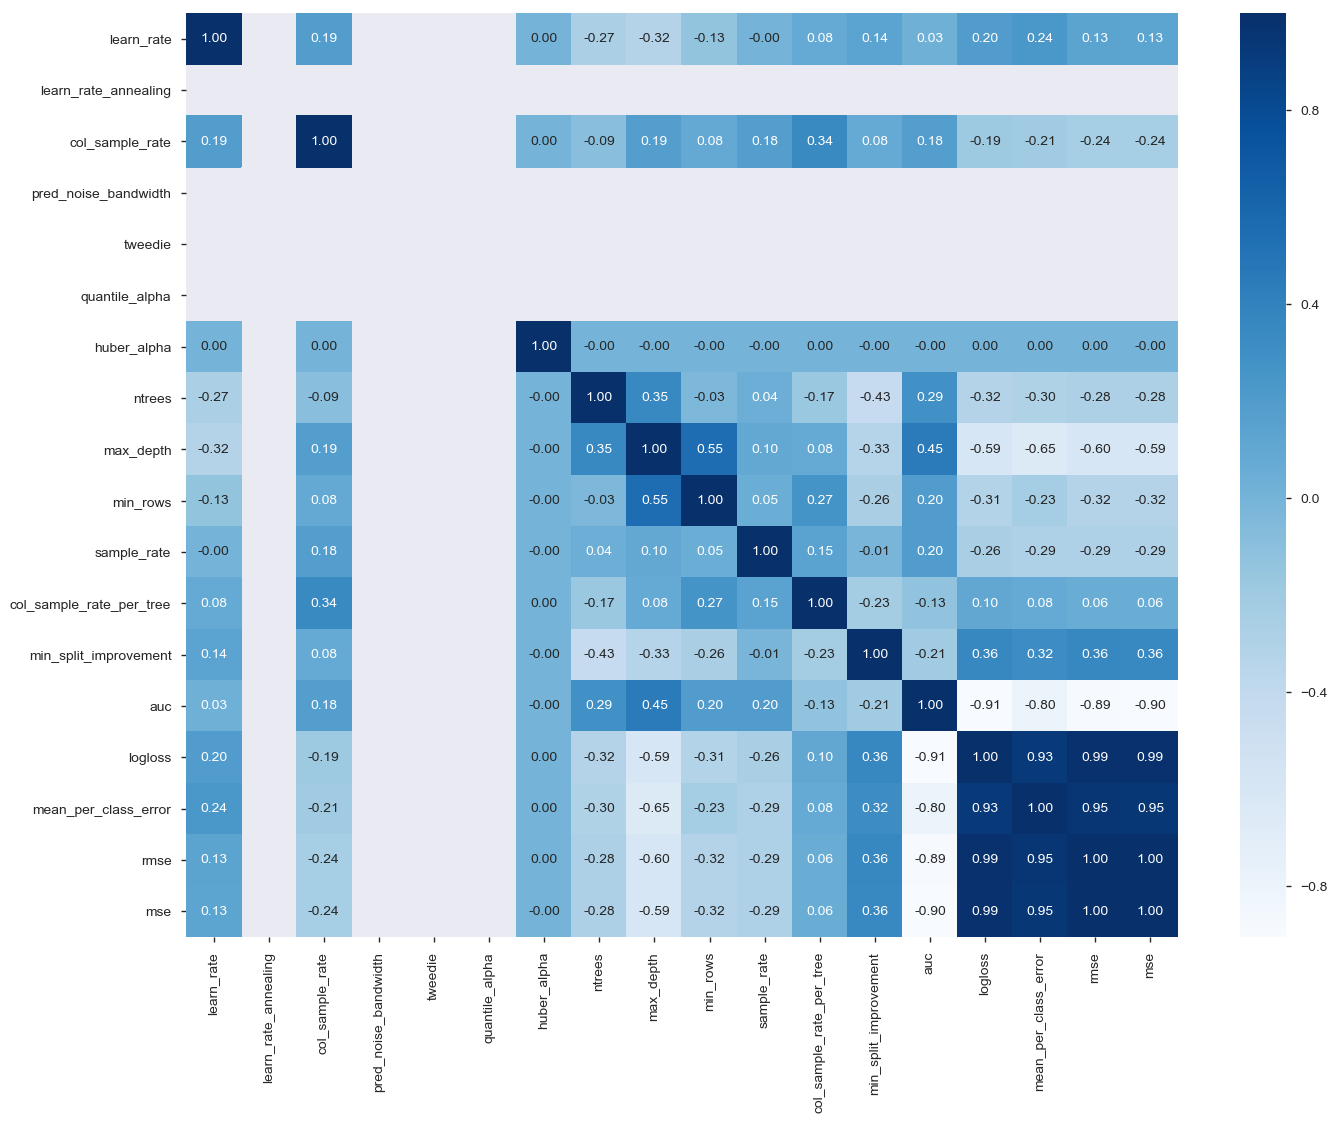

In [370]:
plt.figure(figsize=(16,12))
cor = sns.heatmap(data=gbm_df.corr(),annot=True,fmt='.2f',cmap='Blues')
plt.show()

In [373]:
Y= gbm_df['rmse']
X= gbm_df[['learn_rate', 'learn_rate_annealing',
       'col_sample_rate', 'pred_noise_bandwidth',
        'tweedie', 'quantile_alpha', 'huber_alpha',
     'ntrees', 'max_depth',
       'min_rows', 'sample_rate', 'col_sample_rate_per_tree',
       'min_split_improvement']]

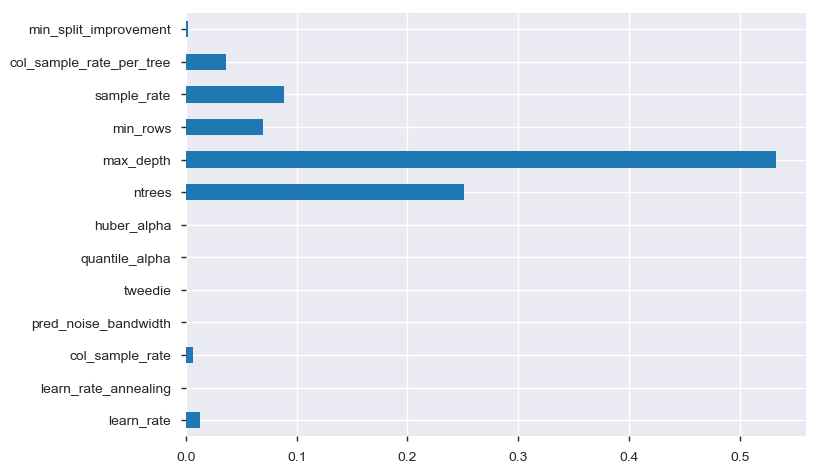

In [374]:
from sklearn import ensemble
model = ensemble.GradientBoostingRegressor()
model.fit(X, Y)

(pd.Series(model.feature_importances_, index=X.columns)
   .plot(kind='barh'))   

The above importance variable concludes that the important hyperparameters are max_depth and n-trees

# Analysis of DRF

In [439]:
drf_df=pd.read_csv("drf_actual.csv", decimal = ',')

In [441]:
drf_df.drop(drf_df.columns[0] , axis=1)

,modelId,mtries,categorical_encoding
0,DRF_1_AutoML_20190415_223833,-1,AUTO
1,DRF_1_AutoML_20190418_113508,-1,AUTO
2,DRF_1_AutoML_20190418_130009,-1,AUTO
3,DRF_1_AutoML_20190418_120619,-1,AUTO


In [377]:
len(drf_df)

4

In [378]:
drf_df.dtypes

Unnamed: 0               int64
modelId                 object
mtries                   int64
categorical_encoding    object
dtype: object

In [379]:
range_mtries = [drf_df['mtries'].min(),drf_df['mtries'].max()]
range_mtries

[-1, -1]

# Range of Hyperparameter for DFR

<table>
<thead>
<tr>
<th>Hyperparameter</th>
<th>Minimum</th>
<th>Maximum</th>
</tr>
</thead>
<tbody>
<tr>
<td>mtries</td>
<td>-1</td>
<td>-1</td>
</tr>
</tbody>
</table>

There is no specific range for the hyperparamter 'mtries' and has a constant value -1.

# XRT

In [380]:
xrt_df=pd.read_csv("xrt_actual.csv", decimal = ',')

In [ ]:
xrt_df.drop(gbm_df.columns[0] , axis=1)

In [381]:
xrt_df.head()

,Unnamed: 0,modelId,mtries,categorical_encoding,auc,logloss,mean_per_class_error,rmse,mse
0,0,XRT_1_AutoML_20190415_223833,-1,AUTO,0.847517742,0.175321621,0.342366018,0.201665632,0.040669027
1,1,XRT_1_AutoML_20190418_113508,-1,AUTO,0.84892478,0.166167732,0.345581935,0.201884499,0.040757351
2,2,XRT_1_AutoML_20190418_130009,-1,AUTO,0.840560717,0.188539717,0.356364958,0.202947437,0.041187662
3,3,XRT_1_AutoML_20190418_120619,-1,AUTO,0.843906533,0.171060627,0.338773157,0.202070482,0.04083248


In [382]:
len(xrt_df)

4

In [383]:
xrt_df.dtypes

Unnamed: 0               int64
modelId                 object
mtries                   int64
categorical_encoding    object
auc                     object
logloss                 object
mean_per_class_error    object
rmse                    object
mse                     object
dtype: object

In [384]:
range_mtries = [xrt_df['mtries'].min(),xrt_df['mtries'].max()]
range_mtries

[-1, -1]

# Range of hyperparameters for XRT

<table>
<thead>
<tr>
<th>Hyperparameter</th>
<th>Minimum</th>
<th>Maximum</th>
</tr>
</thead>
<tbody>
<tr>
<td>mtries</td>
<td>-1</td>
<td>-1</td>
</tr>
</tbody>
</table>

There is no specific range for the hyperparamter 'mtries' and has a constant value -1.

# Analysis of GLM

In [442]:
glm_df=pd.read_csv("glm_actual.csv", decimal = ',')

In [443]:
glm_df.head()

,Unnamed: 0,modelId,seed,tweedie_variance_power,tweedie_link_power,alpha,lambda,missing_values_handling,standardize,theta,auc,logloss,mean_per_class_error,rmse,mse
0,0,GLM_grid_1_AutoML_20190415_223833_model_1,8.89E+17,0,1,"[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]","[0.40044436071981493, 0.24868273229194082, 0.1...",MeanImputation,True,1.00E-10,0.522591052,0.220979243,0.5,0.233516657,0.054530029
1,1,GLM_grid_1_AutoML_20190418_113508_model_1,7.12E+17,0,1,"[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]","[0.40044436071981493, 0.24868273229194082, 0.1...",MeanImputation,True,NaN,0.522591052,0.220979243,0.5,0.233516657,0.054530029
2,2,GLM_grid_1_AutoML_20190418_130009_model_1,7.15E+18,0,1,"[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]","[0.40044436071981493, 0.24868273229194082, 0.1...",MeanImputation,True,1.00E-10,0.867092172,0.15207801,0.30353365,0.200599003,0.04023996
3,3,GLM_grid_1_AutoML_20190418_120619_model_1,6.74E+18,0,1,"[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]","[0.40044436071981493, 0.24868273229194082, 0.1...",MeanImputation,True,1.00E-10,0.522591052,0.220979243,0.5,0.233516657,0.054530029


In [434]:
lb_make = LabelEncoder()
glm_df['missing_values_handling_category'] = lb_make.fit_transform(glm_df['missing_values_handling'])

In [435]:
lb_make = LabelEncoder()
glm_df['standardize_binary'] = lb_make.fit_transform(glm_df['standardize'])

In [436]:
glm_df.head()

,Unnamed: 0,modelId,seed,tweedie_variance_power,tweedie_link_power,alpha,lambda,missing_values_handling,standardize,theta,auc,logloss,mean_per_class_error,rmse,mse,missing_values_handling_category,standardize_binary
0,0,GLM_grid_1_AutoML_20190415_223833_model_1,8.89E+17,0,1,"[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]","[0.40044436071981493, 0.24868273229194082, 0.1...",MeanImputation,True,1.00E-10,0.522591052,0.220979243,0.5,0.233516657,0.054530029,0,0
1,1,GLM_grid_1_AutoML_20190418_113508_model_1,7.12E+17,0,1,"[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]","[0.40044436071981493, 0.24868273229194082, 0.1...",MeanImputation,True,NaN,0.522591052,0.220979243,0.5,0.233516657,0.054530029,0,0
2,2,GLM_grid_1_AutoML_20190418_130009_model_1,7.15E+18,0,1,"[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]","[0.40044436071981493, 0.24868273229194082, 0.1...",MeanImputation,True,1.00E-10,0.867092172,0.15207801,0.30353365,0.200599003,0.04023996,0,0
3,3,GLM_grid_1_AutoML_20190418_120619_model_1,6.74E+18,0,1,"[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]","[0.40044436071981493, 0.24868273229194082, 0.1...",MeanImputation,True,1.00E-10,0.522591052,0.220979243,0.5,0.233516657,0.054530029,0,0


In [437]:
pandas_profiling.ProfileReport(glm_df)

Number of variables,17
Number of observations,4
Total Missing (%),1.5%
Total size in memory,580.0 B
Average record size in memory,145.0 B
Numeric,1
Categorical,6
Boolean,0
Date,0
Text (Unique),2
Rejected,8


# Trying to find the range of hyperparameters

In [391]:
alpha_list = ['0.0', '0.2', '0.4', '0.6', '0.8', '1.0']

In [392]:
alpha = [float(i) for i in alpha_list] 
alpha

[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

In [393]:
range_mtries = [min(alpha),max(alpha)]
range_mtries

[0.0, 1.0]

In [394]:
lambda_list = ['0.40044436071981493', '0.24868273229194082', '0.15443618990917896', '0.09590749037478274', '0.05956017637704195', '0.036987878592192616', '0.022970099250379815', '0.014264820791416522', '0.008858695384516653', '0.005501399916841423', '0.003416462552479351', '0.0021216811264277652', '0.0013175999248032143']

In [395]:
lambda_list = [float(i) for i in lambda_list] 
lambda_list

[0.40044436071981493,
 0.24868273229194082,
 0.15443618990917896,
 0.09590749037478274,
 0.05956017637704195,
 0.036987878592192616,
 0.022970099250379815,
 0.014264820791416522,
 0.008858695384516653,
 0.005501399916841423,
 0.003416462552479351,
 0.0021216811264277652,
 0.0013175999248032143]

In [396]:
range_mtries = [min(lambda_list),max(lambda_list)]
range_mtries

[0.0013175999248032143, 0.40044436071981493]

In [397]:
range_mtries = [glm_df['seed'].min(),glm_df['seed'].max()]
range_mtries

['6.74E+18', '8.89E+17']

In [398]:
range_mtries = [glm_df['tweedie_variance_power'].min(),glm_df['tweedie_variance_power'].max()]
range_mtries

[0, 0]

In [445]:
range_mtries = [glm_df['tweedie_link_power'].min(),glm_df['tweedie_link_power'].max()]
range_mtries

[1, 1]

# Range of hyperparameters for GLM

<table>
<thead>
<tr>
<th>Hyperparameter</th>
<th>Minimum</th>
<th>Maximum</th>
</tr>
</thead>
<tbody>
<tr>
<td>seed</td>
<td>711766579752531550</td>
<td>7150684335027209933</td>
</tr>
<tr>
<td>tweedie_variance_power</td>
<td>0.0</td>
<td>0.0</td>
</tr>
<tr>
<td>tweedie_link_power</td>
<td>1.0</td>
<td>1.0</td>
</tr>
<tr>
<td>alpha</td>
<td>0.0</td>
<td>1.0</td>
</tr>
<tr>
<td>lambda_list</td>
<td>0.0013175999248032143</td>
<td>0.40044436071981493</td>
</tr>
<tr>
<td>theta</td>
<td>1e-10</td>
<td>1e-10</td>
</tr>
</tbody>
</table>

The above table shows us the range of hyperparamters.